In [39]:
from IPython.display import HTML
import re
import copy

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

import numpy as np
from scipy.special import binom
import itertools
import requests


from io import StringIO as sio
from io import BytesIO as csio

## set default matplotlib font and font size
typeface='helvetica'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import os,random
from itertools import permutations


import sys
sys.path.append('/Users/nmueller/Documents/github/Plasmids-Material/Applications/Shigella2024/visualisation_code')
import baltic as bt



In [40]:
filenames = ['Sson_NC_009345_spA_over70.full',
             'Sson_NC_009345_strABsul2.full',
             'Sson_NC_009345_4AMRgenes.full']

# colours={'NC_007384':(0.2981622478541206, 0.44644367598435458, 0.64719724652229571),
#         'NC_007385':"#E69F00",
#         'NC_009345':"#0072B2",
#         'NC_009346':"#009E73",
#         'NC_009347':"#D55E00"}

cmap=mpl.cm.viridis
cumulative_displace=0 ## this tracks the "current" x position, so trees are plotted one after another
path='/Users/nmueller/Documents/github/Plasmids-Material/Applications/Shigella2024/tangletrees/' ## path to trees
trees={} ## dict
# read in the corresponding chromosome tree
tree_path=os.path.join(path, 'chromosome_divergence_tree.nexus') ## path to tree
trees['chromosome']=bt.loadNewick(tree_path, absoluteTime=False) ## load tree

# for each segment, load first the corresponding chromosome tree and then the plasmid tree
for filename in filenames:
    print(filename,)    

    tree_path=os.path.join(path, filename+'_divergence_tree.nexus') ## path to tree
    print(tree_path,)
    trees[filename]=bt.loadNewick(tree_path, absoluteTime=False) ## load tree

print('\nDone!')


tip_positions={x:{} for x in trees} ## remember the position of each tip in each tree

for t,tr in enumerate(trees.keys()): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    for k in cur_tree.Objects:
        if k.branchType=='leaf':
            tip_positions[tr][k.name]=(k.height,k.y) ## remember (X, Y) position of tip

cmap=mpl.cm.Spectral

segments=['chromosome','entire spA','strA & B + sul + flanking','AMR genes only']

segments = ['chromosome', 'Sson_NC_009345_spA_over70.full',
             'Sson_NC_009345_strABsul2.full',
             'Sson_NC_009345_4AMRgenes.full']


for X in range(10): ## 10 untangling iterations
    print('iteration %d'%(X+1))
    for t,tr in enumerate(segments): ## iterate over each tree
        print(tr)
        ptr=segments[t-1] ## previous tree
        ntr=segments[t] ## next tree
        seg=trees[ptr] ## fetch appropriate tree
        nex_seg=trees[ntr]
        for k in sorted(nex_seg.Objects,key=lambda q:q.height): ## iterate over branches from most recent to oldest
            if k.branchType=='node': ## can only sort nodes
                leaves=[w.leaves if w.branchType=='node' else [w.name] for w in k.children] ## descendent tips in current order
                
#                 leaves=[[seg.tipMap[tip] for tip in w.leaves] if w.branchType=='node' else [w.name] for w in k.children] ## descendent tips in current order
                
                for c in range(len(leaves)):
#                     leaves[c]=sorted(leaves[c],key=lambda x:tip_positions[ntr][x][1]) ## sort leaves according to their positions in the next tree
                    leaves[c]=sorted(leaves[c],key=lambda x:tip_positions[ntr][x][1] if x in tip_positions[ntr] else 0.0) ## sort leaves according to their positions in the next tree
                
                ys=[sorted([tip_positions[ntr][w][1] for w in cl if w in tip_positions[ntr]]) for cl in leaves] ## extract y positions of descendents
                merge_ys=sum(ys,[]) ## flatten list of tip y coordinates
                ypos=range(int(min(merge_ys)),int(max(merge_ys))+1) ## get y positions of tips in current order
                order={i:x for i,x in enumerate(leaves)} ## dict of tip order: tip name
                
                new_order=sorted(order.keys(),key=lambda x:-np.mean([(tip_positions[ptr][order[x][w]][1]-ypos[w]) for w in range(min([len(order[x]),len(ypos)])) if order[x][w] in tip_positions[ptr]])) ## get new order by sorting existing order based on y position differences
                
#                 new_order=sorted(order.keys(),key=lambda x:-np.mean([(tip_positions[ptr][order[x][w]][1]-ypos[w]) for w in range(len(order[x]))])) ## get new order by sorting existing order based on y position differences
                
                if new_order!=range(len(leaves)): ## if new order is not current order
                    k.children=[k.children[i] for i in new_order] ## assign new order of child branches
                    nex_seg.drawTree() ## update y positions

                    for w in nex_seg.Objects: ## iterate over objects in next tree
                        if w.branchType=='leaf':
                            tip_positions[ntr][w.name]=(w.height,w.y) ## remember new positions
                
        if t==0: ## if first tree
            trees[segments[t]].drawTree() ## update positions
            lvs=sorted([w for w in trees[segments[t]].Objects if w.branchType=='leaf'],key=lambda x:x.y) ## get leaves in y position order
            
            norm=mpl.colors.Normalize(0,len(lvs))
            pos_colours={w.name:cmap(norm(w.y)) for w in lvs} ## assign colour



Sson_NC_009345_spA_over70.full
/Users/nmueller/Documents/github/Plasmids-Material/Applications/Shigella2024/tangletrees/Sson_NC_009345_spA_over70.full_divergence_tree.nexus
Sson_NC_009345_strABsul2.full
/Users/nmueller/Documents/github/Plasmids-Material/Applications/Shigella2024/tangletrees/Sson_NC_009345_strABsul2.full_divergence_tree.nexus
Sson_NC_009345_4AMRgenes.full
/Users/nmueller/Documents/github/Plasmids-Material/Applications/Shigella2024/tangletrees/Sson_NC_009345_4AMRgenes.full_divergence_tree.nexus

Done!
iteration 1
chromosome


/opt/homebrew/Caskroom/miniconda/base/envs/plasmids/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniconda/base/envs/plasmids/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 2
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 3
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 4
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 5
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 6
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 7
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 8
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.full
iteration 9
chromosome
Sson_NC_009345_spA_over70.full
Sson_NC_009345_strABsul2.full
Sson_NC_009345_4AMRgenes.fu

[0.165659, 0.05557926666666667, 0.05387701777777778, 0.05276625088888889]


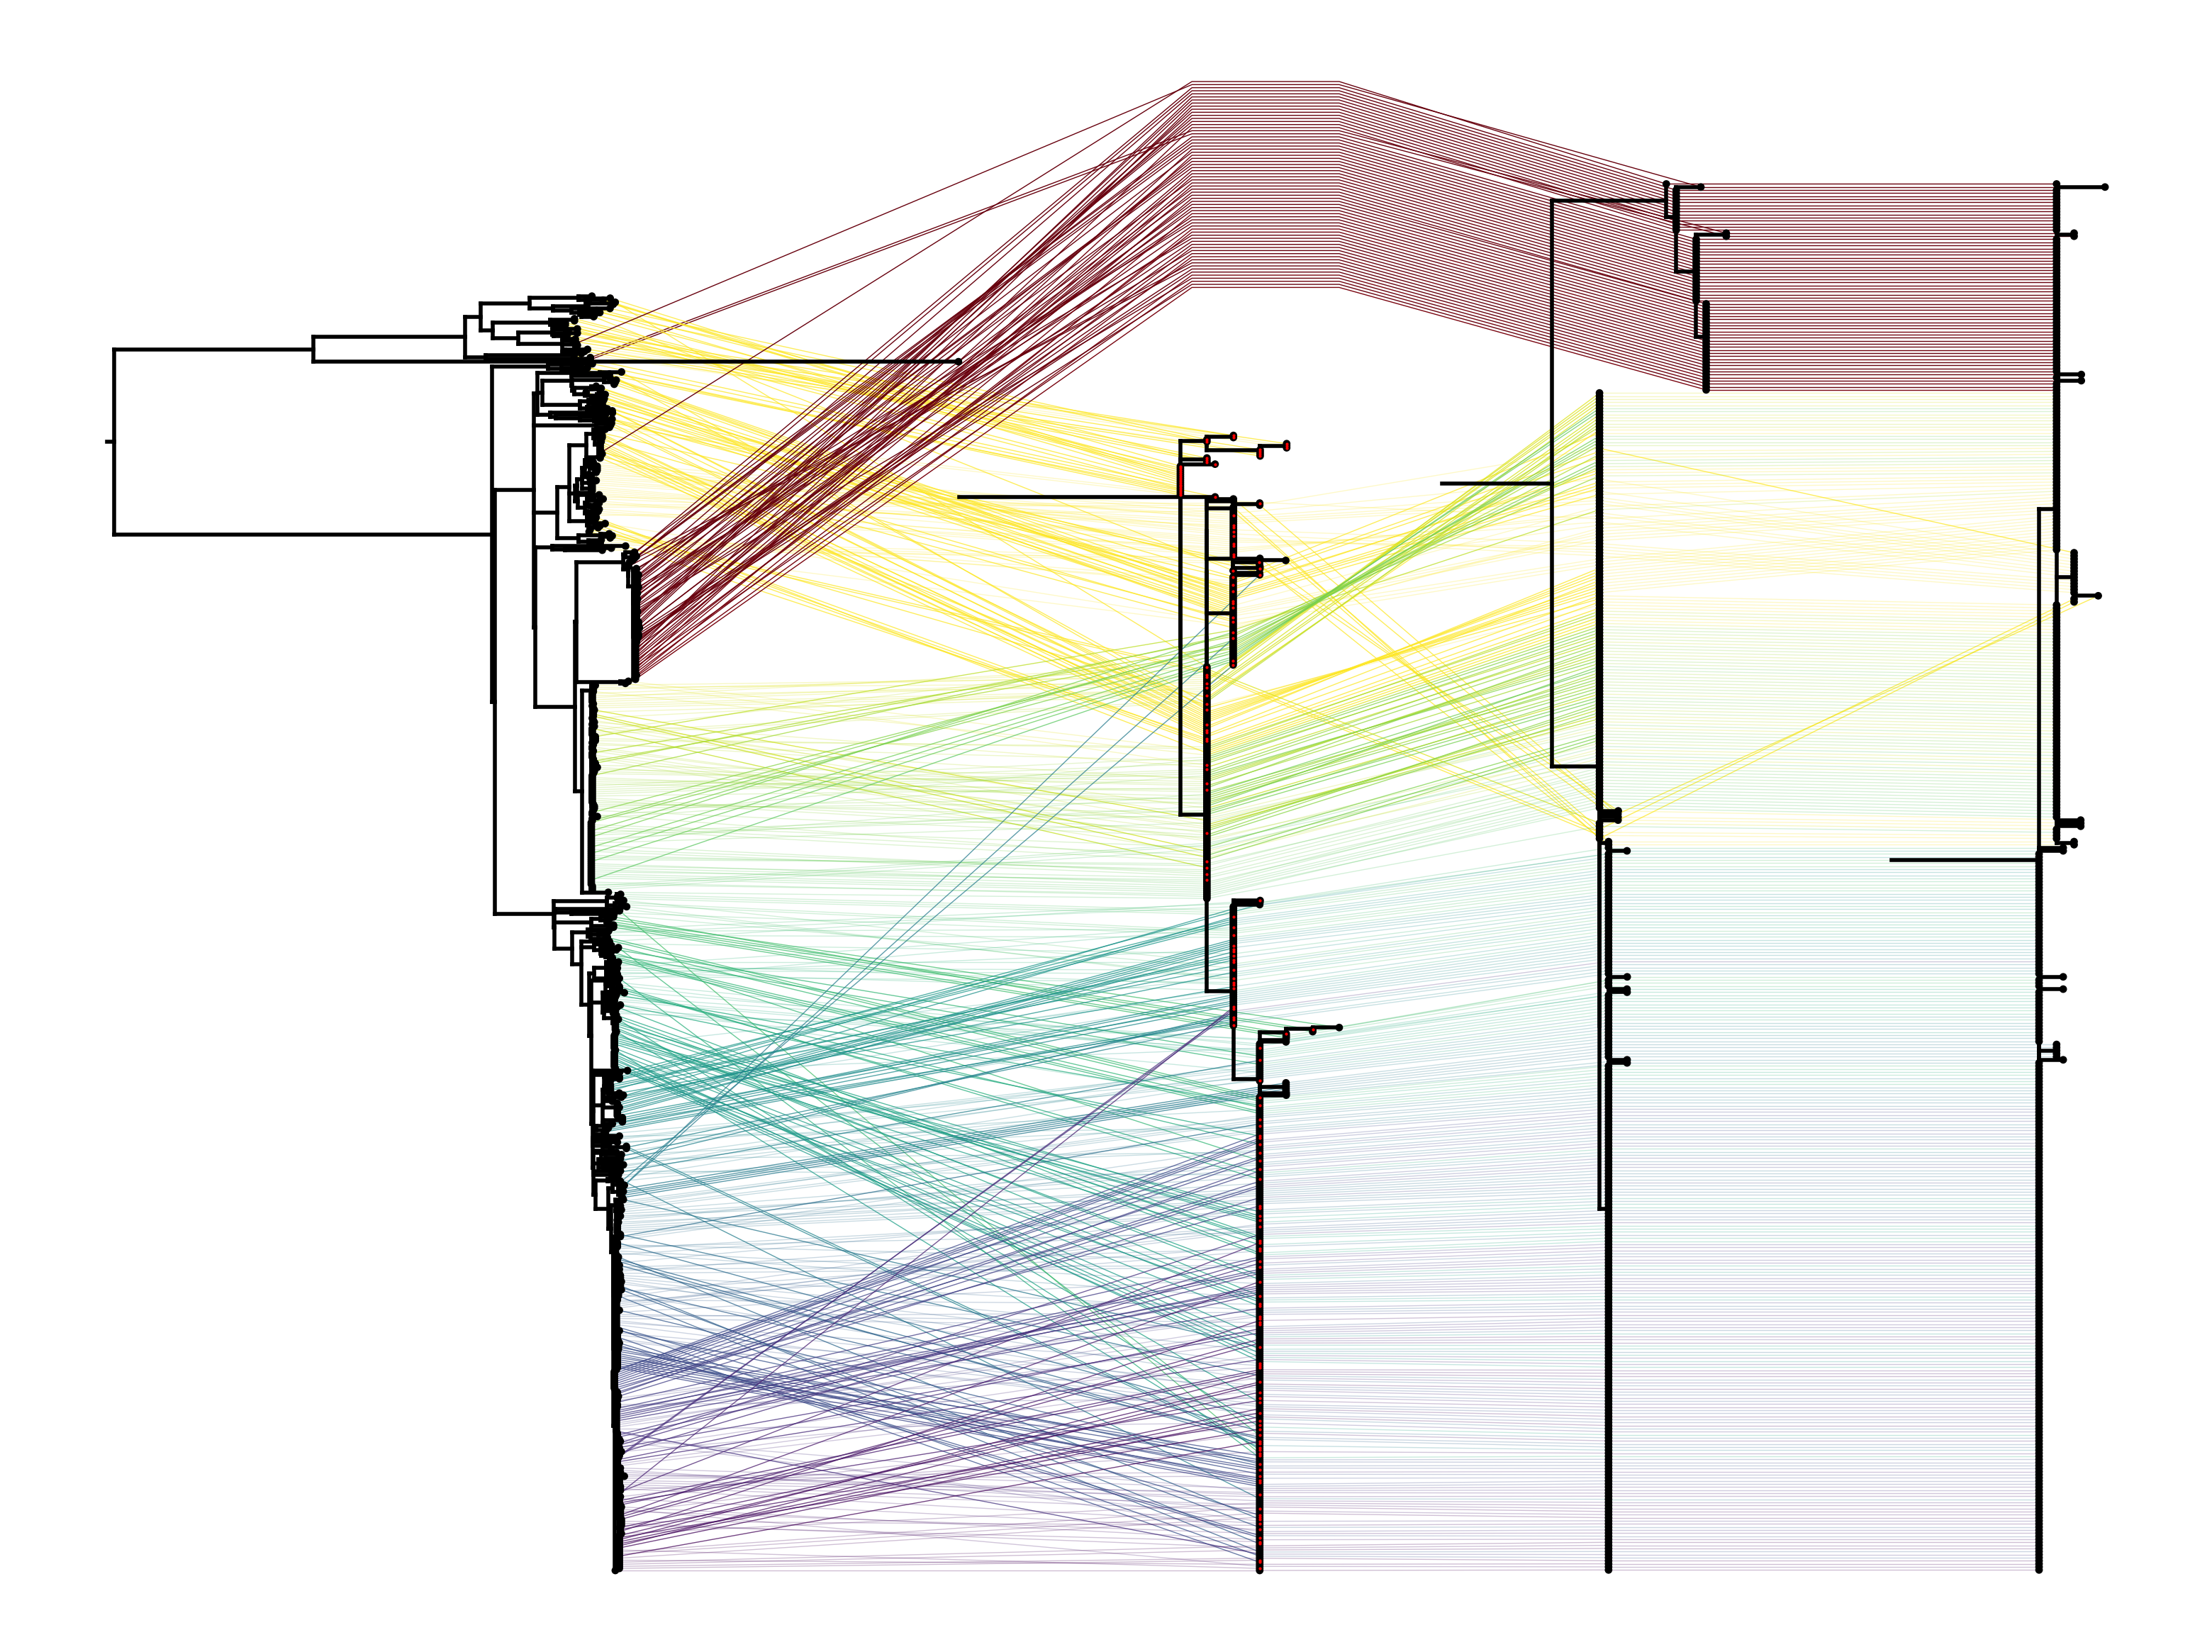

In [42]:
fig,ax = plt.subplots(figsize=(40,30),facecolor='w')

tree_scaler = [1,30,15,20]
y_scaler = [1,1,1.5,1.5]

cmap=mpl.cm.viridis
cmap2=mpl.cm.Reds
cumulative_displace=0 ## this tracks the "current" x position, so trees are plotted one after another

tree_names=segments
# compute the cumulative displacement for each tree

displaceAmount=0.05
displacement = [trees[tr].treeHeight for tr in tree_names]
for t,tr in enumerate(tree_names): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    correction_term = (cur_tree.treeHeight+cumulative_displace)/(tree_scaler[t]) - cur_tree.treeHeight - cumulative_displace
    cumulative_displace+=cur_tree.treeHeight+displaceAmount +correction_term ## increment displacement by the height of the tree
    displacement[t] = cumulative_displace
    

print(displacement)
leaf_x_and_y_names = {} # keeps track of x and y for each tree and leaf
cumulative_displace=0
for t,tr in enumerate(tree_names): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    correction_term = (cur_tree.treeHeight+cumulative_displace)/(tree_scaler[t]) - cur_tree.treeHeight - cumulative_displace
    x_attr=lambda k: k.height+cumulative_displace + correction_term

    # get the maximum height after correction in x_attr
    max_height = max([x_attr(k) for k in cur_tree.Objects])

    def colour_func(node):
        return 'k'
        
    cn_func=colour_func
    
    cur_tree.plotTree(ax,x_attr=x_attr,width=4,colour=cn_func, xscaler=tree_scaler[t], yscaler=y_scaler[t]) ## plot tree
    cur_tree.plotPoints(ax,x_attr=x_attr,size=30,colour=cn_func,zorder=100, xscaler=tree_scaler[t], yscaler=y_scaler[t]) ## plot tips

    # make a list of the x and y coordinates for each leaf
    leaf_x_and_y_names[tr] = {}

    for k in cur_tree.Objects: ## iterate over branches
        if k.branchType=='leaf': ## if leaf...
            y=k.y
            pos_in_first_tree=tip_positions['chromosome'][k.name][1] ## fetch y coordinate of same tip in the first tree
            # add the name of the leaf and its x and y coordinates for tree t
            leaf_x_and_y_names[tr][k.name] = ((x_attr(k))*tree_scaler[t], y*y_scaler[t])


    cumulative_displace+=cur_tree.treeHeight+displaceAmount ## increment displacement by the height of the tree

# for each leaf in the first tree, draw a line to the next tree trees
for leaf in leaf_x_and_y_names['chromosome']:
    x1, y1 = leaf_x_and_y_names['chromosome'][leaf]
    # set the color based on y1
    color = cmap(y1/cur_tree.ySpan)
    try:
        x2, y2 = leaf_x_and_y_names[segments[1]][leaf]
        # determine the alpha based on the difference between y1 and y2
        if abs(y1-y2) <50:
            alpha = 0.25
        else:
            alpha = 0.75
        ax.plot([x1, x1, x2,x2], [y1, y1, y2, y2], color=color, lw=1, ls='-', zorder=-1, alpha=alpha)
        try:
            x3, y3 = leaf_x_and_y_names[segments[2]][leaf]
            if abs(y2-y3) <50:
                alpha = 0.25
            else:
                alpha = 0.75
            ax.plot([x2, x2, x3,x3], [y2, y2, y3, y3], color=color, lw=1, ls='-', zorder=-1, alpha=alpha)
            try:
                x4, y4 = leaf_x_and_y_names[segments[3]][leaf]
                if abs(y3-y4) <50:
                    alpha = 0.25
                else:
                    alpha = 0.75

                ax.plot([x3, x3, x4,x4], [y3, y3, y4, y4], color=color, lw=1, ls='-', zorder=-1, alpha=alpha)
            except:
                # mark the dot
                ax.plot(x3, y3, 'o', color='red', markersize=2, zorder=1000)
                pass

        except:
            # mark the dot 
            ax.plot(x2, y2, 'o', color='red', markersize=2, zorder=1000)
            pass
    except:
        color = cmap2(y1/cur_tree.ySpan)
        try:
            x2, y2 = leaf_x_and_y_names[segments[2]][leaf]
            # the maximum value of x in segments[1]
            max_val = max([leaf_x_and_y_names[segments[1]][k][0] for k in leaf_x_and_y_names[segments[1]]])
            ax.plot([x1, x1,max_val-0.02,max_val, x2,x2], [y1, y1,y2+50,y2+50, y2, y2], color=color, lw=1, ls='-', zorder=-1)
            try:
                x3, y3 = leaf_x_and_y_names[segments[3]][leaf]
                ax.plot([x2, x2, x3,x3], [y2, y2, y3, y3], color=color, lw=1, ls='-', zorder=-1)
            except:
                pass
        except:
            pass
    pass

[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

ax.tick_params(axis='x',size=0)
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_ylim(-1,cur_tree.ySpan+1) ## set y limits
# ax.set_xlim(-5,cumulative_displace+5)

plt.show()
# save as pdf
fig.savefig('/Users/nmueller/Documents/github/Plasmids-Text/Figures/spA_tanglegrams.pdf',bbox_inches='tight', dpi=300)